# Problem 1:

<b> You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.</b>


In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df= pd.read_csv("cubic_zirconia.csv")

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<b>1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.</b>

In [6]:
df.shape

(26967, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


<b>1.2. Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers. Interpret the inferences for each.</b>

In [10]:
df.duplicated().sum()

34

In [11]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
iqr = Q3-Q1
iqr

carat       0.65
depth       1.50
table       3.00
x           1.84
y           1.83
z           1.14
price    4411.00
dtype: float64

In [14]:
outliers = (df<(Q1-1.5*iqr))|(df>(Q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


carat       657
clarity       0
color         0
cut           0
depth      1219
price      1778
table       318
x            14
y            14
z            22
dtype: int64

C:\Users\karthika\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


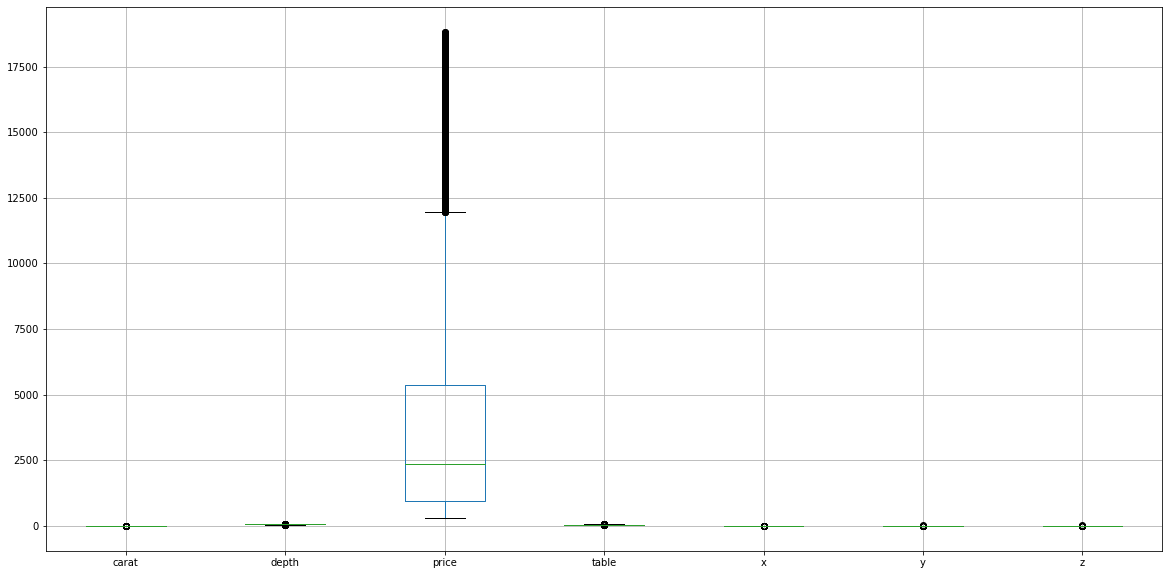

In [15]:
plt.figure(figsize=(20,10))
df[['carat','depth','price','table','x','y','z']].boxplot()
plt.show()

In [16]:
cor = df.corr()
cor

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


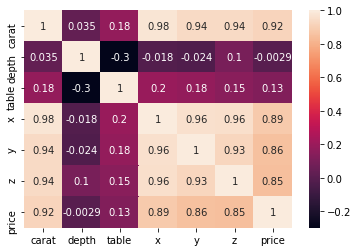

In [17]:
sns.heatmap(cor,annot=True)

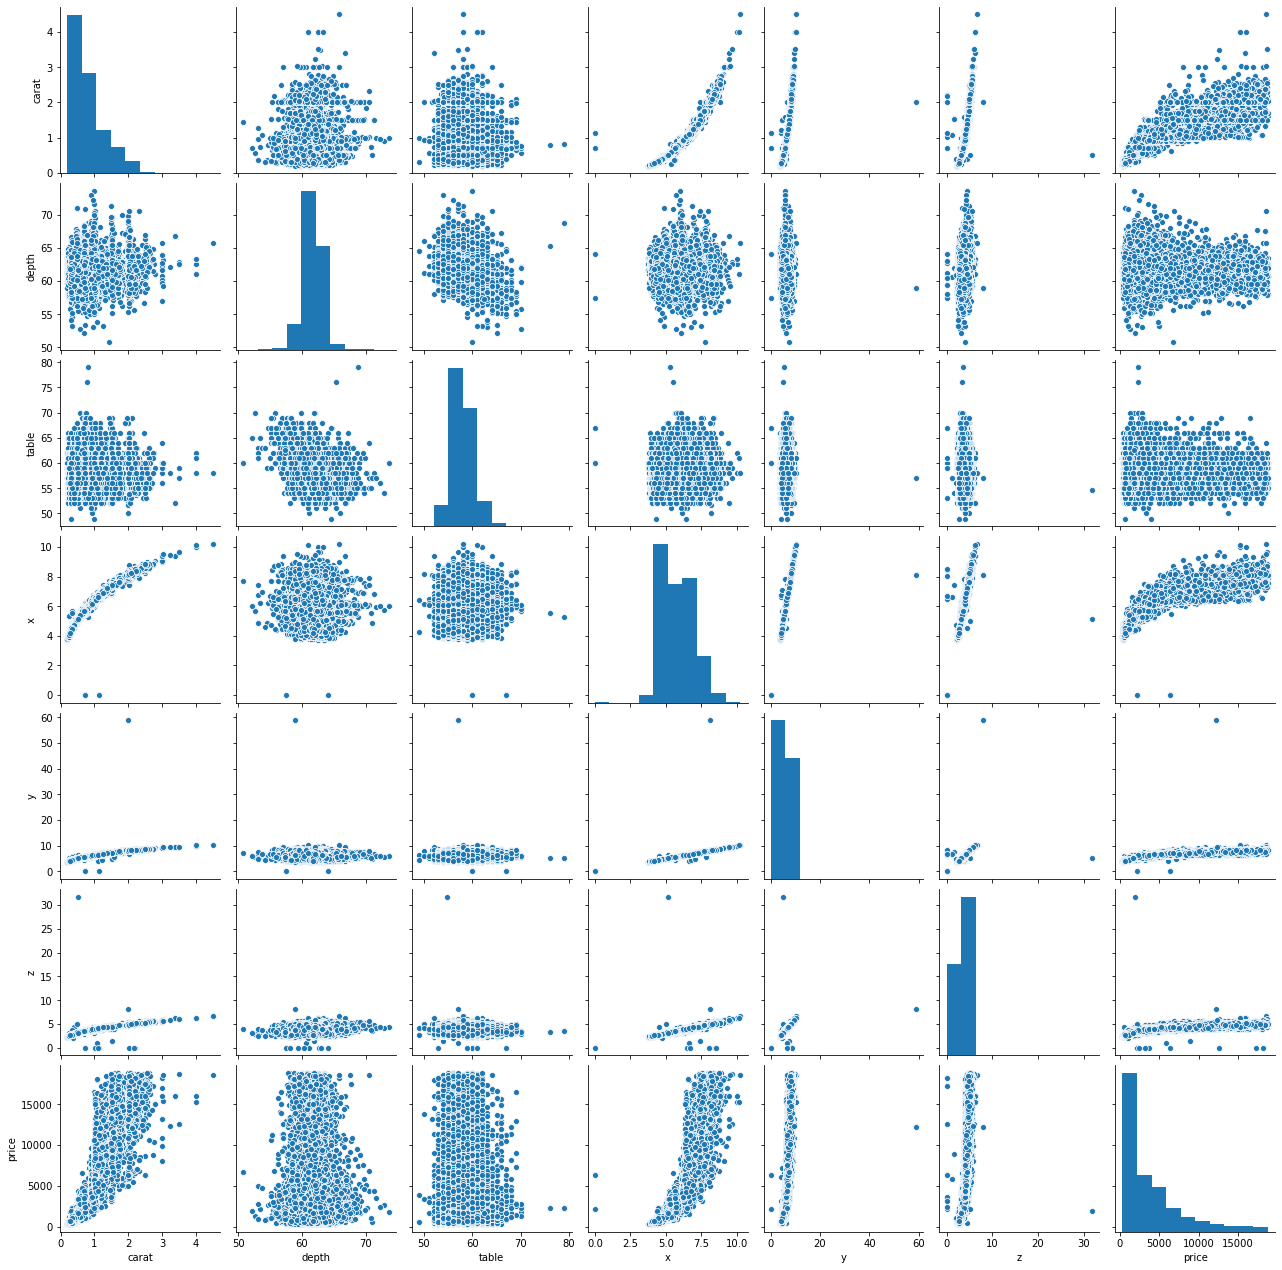

In [18]:
sns.pairplot(df)

<b>1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?</b>

In [19]:
df['depth'].mean()

61.745285104437116

In [20]:
df['depth'].median()

61.8

In [21]:
df['depth'].mode()

0    62.0
dtype: float64

In [22]:
df['depth'].fillna(df['depth'].median(), inplace=True)

In [23]:
df[df.values==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381


In [24]:
df[df.values==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 5821 to 23758
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    12 non-null     float64
 1   cut      12 non-null     object 
 2   color    12 non-null     object 
 3   clarity  12 non-null     object 
 4   depth    12 non-null     float64
 5   table    12 non-null     float64
 6   x        12 non-null     float64
 7   y        12 non-null     float64
 8   z        12 non-null     float64
 9   price    12 non-null     int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ KB


In [25]:
df = df.replace(0, np.nan)
df = df.dropna(axis=0)

In [26]:
df[df.values==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [27]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler

Yes, scaling is necessary for this data set.

<b>1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.</b>

Removing the outliers befor creating the model.

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
outliers = (df<(Q1-1.5*iqr))|(df>(Q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


carat       655
clarity       0
color         0
cut           0
depth      1217
price      1775
table       317
x            12
y            12
z            14
dtype: int64

In [31]:
col =['carat','depth','table','x','y','z']
for column in df[col]:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [32]:
outliers = (df<(Q1-1.5*iqr))|(df>(Q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


carat         0
clarity       0
color         0
cut           0
depth         0
price      1775
table         0
x             0
y             0
z             0
dtype: int64

In [33]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [34]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [35]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [36]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY :  8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




Performimng one hot label encoding for the object type columns

In [37]:
df = pd.get_dummies(df, columns=['cut','clarity','color'],drop_first=True)

In [38]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [39]:
df.shape

(26925, 24)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26925 non-null  float64
 1   depth          26925 non-null  float64
 2   table          26925 non-null  float64
 3   x              26925 non-null  float64
 4   y              26925 non-null  float64
 5   z              26925 non-null  float64
 6   price          26925 non-null  int64  
 7   cut_Good       26925 non-null  uint8  
 8   cut_Ideal      26925 non-null  uint8  
 9   cut_Premium    26925 non-null  uint8  
 10  cut_Very Good  26925 non-null  uint8  
 11  clarity_IF     26925 non-null  uint8  
 12  clarity_SI1    26925 non-null  uint8  
 13  clarity_SI2    26925 non-null  uint8  
 14  clarity_VS1    26925 non-null  uint8  
 15  clarity_VS2    26925 non-null  uint8  
 16  clarity_VVS1   26925 non-null  uint8  
 17  clarity_VVS2   26925 non-null  uint8  
 18  color_

In [41]:
outliers = (df<(Q1-1.5*iqr))|(df>(Q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


carat               0
clarity_IF          0
clarity_SI1         0
clarity_SI2         0
clarity_VS1         0
clarity_VS2         0
clarity_VVS1        0
clarity_VVS2        0
color_E             0
color_F             0
color_G             0
color_H             0
color_I             0
color_J             0
cut_Good            0
cut_Ideal           0
cut_Premium         0
cut_Very Good       0
depth               0
price            1775
table               0
x                   0
y                   0
z                   0
dtype: int64

<b>Train test split</b>

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X=df.drop("price",axis=1)
y = df[['price']]

In [44]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

<b>scaling the data</b>

In [45]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

<b>Fit into Linear regression model</b>

In [46]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [47]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.6251490565746374
The coefficient for depth is -0.012068197740029592
The coefficient for table is -0.022000668195197092
The coefficient for x is -0.6184060765832116
The coefficient for y is 0.25278588346682496
The coefficient for z is -0.21907604585175755
The coefficient for cut_Good is 0.03316793044825407
The coefficient for cut_Ideal is 0.08950208015867668
The coefficient for cut_Premium is 0.07227203591185453
The coefficient for cut_Very Good is 0.05966466873392079
The coefficient for clarity_IF is 0.2087787512710616
The coefficient for clarity_SI1 is 0.32244867524375925
The coefficient for clarity_SI2 is 0.195397879562246
The coefficient for clarity_VS1 is 0.34949612185212586
The coefficient for clarity_VS2 is 0.37449105721704284
The coefficient for clarity_VVS1 is 0.2701999559262253
The coefficient for clarity_VVS2 is 0.3121948655811002
The coefficient for color_E is -0.019304160120856256
The coefficient for color_F is -0.02625166463980188
The coeffic

In [48]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.179409620270309e-16


In [49]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9290765594915273

In [50]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9260028765630178

<b>RMSE</b>

In [51]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.27202412289534583

In [52]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [53]:
import math

math.sqrt(mse)

0.2663145518150912

In [54]:
y_pred = regression_model.predict(X_test_scaled)

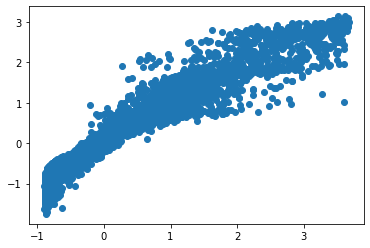

In [55]:
plt.scatter(y_test_scaled['price'], y_pred)

<b>R squared</b>

In [56]:
data_train = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J,price
5030,0.668077,1.269083,-0.660885,0.713451,0.760994,0.883039,3.151529,-0.820311,-0.582354,-0.538769,...,-0.536719,-0.26846,-0.321643,2.112183,-0.461647,-0.515343,-0.423657,-0.338157,-0.23721,0.033961
12108,0.472372,1.843266,-0.660885,0.508309,0.581385,0.753145,-0.317306,-0.820311,-0.582354,1.856084,...,-0.536719,-0.26846,-0.321643,-0.473444,-0.461647,-0.515343,-0.423657,-0.338157,-0.23721,0.308658
20181,-0.266960,-0.863596,1.843240,-0.116038,-0.083170,-0.184973,3.151529,-0.820311,-0.582354,-0.538769,...,1.863172,-0.26846,-0.321643,-0.473444,-0.461647,-0.515343,-0.423657,2.957209,-0.23721,-0.554103
4712,-0.071254,-2.258041,2.585202,0.285328,0.213186,-0.098378,3.151529,-0.820311,-0.582354,-0.538769,...,-0.536719,-0.26846,-0.321643,-0.473444,-0.461647,1.940454,-0.423657,-0.338157,-0.23721,-0.369725
2548,0.472372,0.858953,0.730295,0.570743,0.545463,0.652117,-0.317306,-0.820311,1.717169,-0.538769,...,-0.536719,-0.26846,-0.321643,-0.473444,-0.461647,1.940454,-0.423657,-0.338157,-0.23721,0.670927


In [57]:
data_train.rename(columns = {"cut_Very Good": "cut_VeryGood"}, inplace=True)

In [58]:
exp = 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+color_E+color_F+color_G+color_H+color_I+color_J'

In [59]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=exp , data = data_train).fit()
lm1.params

Intercept      -1.988156e-17
carat           1.625149e+00
depth          -1.206820e-02
table          -2.200067e-02
x              -6.184061e-01
y               2.527859e-01
z              -2.190760e-01
cut_Good        3.316793e-02
cut_Ideal       8.950208e-02
cut_Premium     7.227204e-02
cut_VeryGood    5.966467e-02
clarity_IF      2.087788e-01
clarity_SI1     3.224487e-01
clarity_SI2     1.953979e-01
clarity_VS1     3.494961e-01
clarity_VS2     3.744911e-01
clarity_VVS1    2.702000e-01
clarity_VVS2    3.121949e-01
color_E        -1.930416e-02
color_F        -2.625166e-02
color_G        -4.966297e-02
color_H        -9.098277e-02
color_I        -1.164511e-01
color_J        -1.257966e-01
dtype: float64

In [60]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.024e+04
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:50:34   Log-Likelihood:                -2206.5
No. Observations:               18847   AIC:                             4461.
Df Residuals:                   18823   BIC:                             4649.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.988e-17      0.002     -1e-14   

<b>1.4 Inference: Basis on these predictions, what are the business insights and recommendations.</b>
<br>Explained in business report

# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

<b>2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.</b>

In [61]:
df1 = pd.read_csv("Holiday_Package.csv")

In [62]:
df1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [63]:
df1.drop(df1.columns[0], axis=1, inplace=True)

In [64]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [66]:
df1.duplicated().sum()

0

In [67]:
df1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [68]:
df1.shape

(872, 7)

In [69]:
df1.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [70]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')
        

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [71]:
df1['educ'].unique()

array([ 8,  9, 11, 12, 14, 19, 10, 13, 15,  4, 17,  7, 16,  6,  5, 21,  2,
       18,  3,  1], dtype=int64)

In [72]:
df1.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


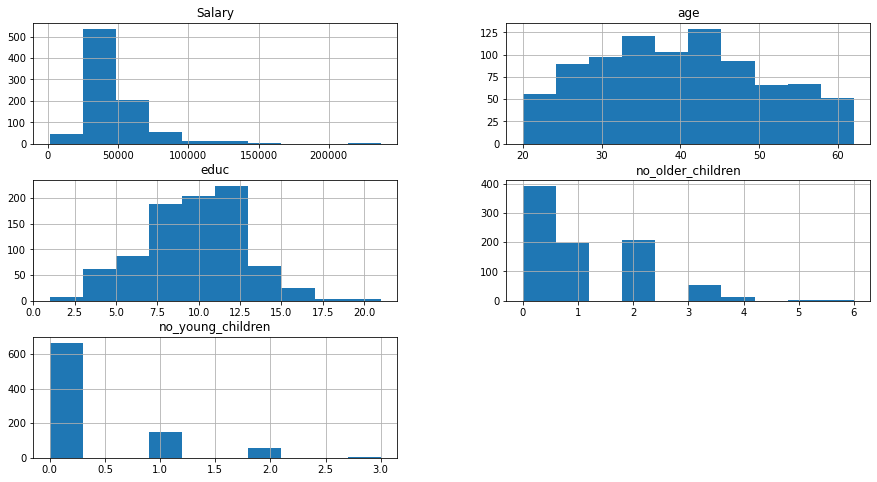

In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df1[['Salary','age','educ','no_young_children','no_older_children']].hist();

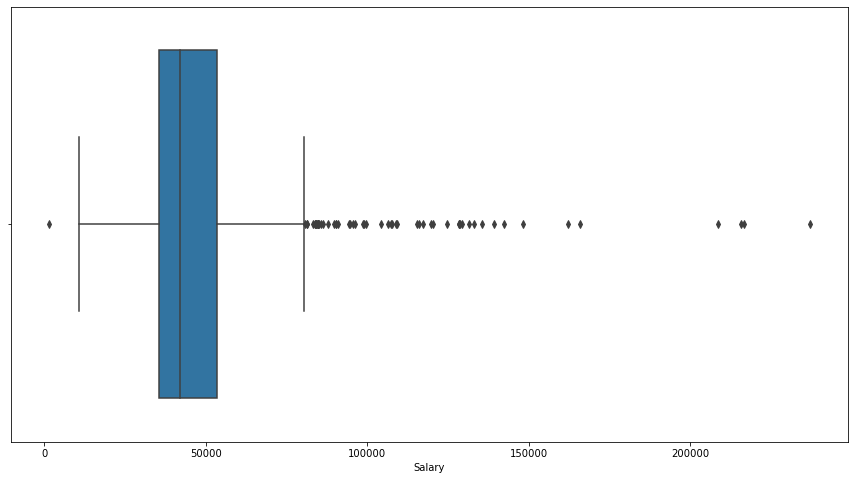

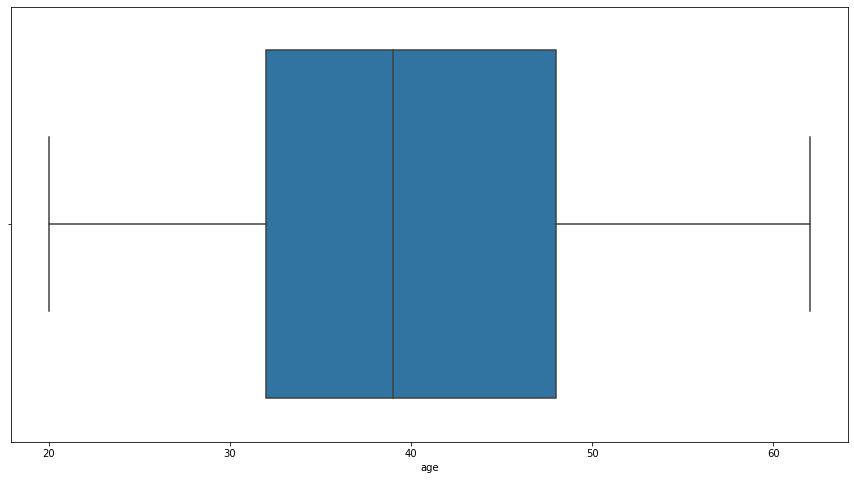

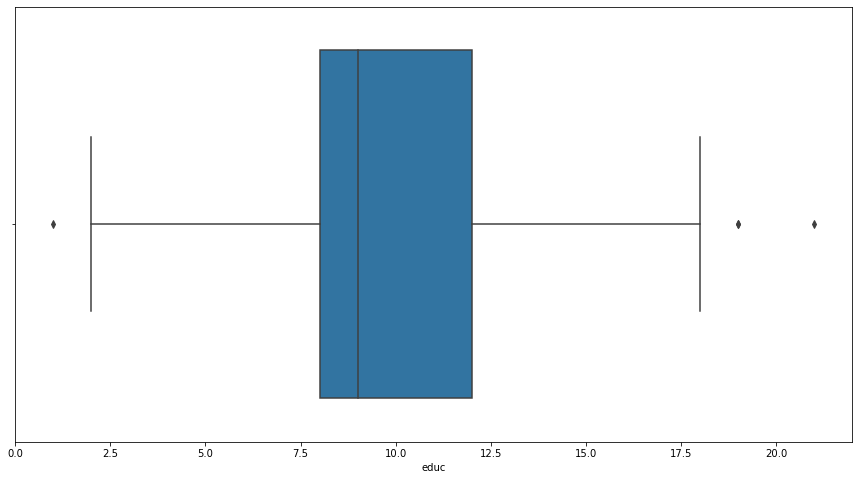

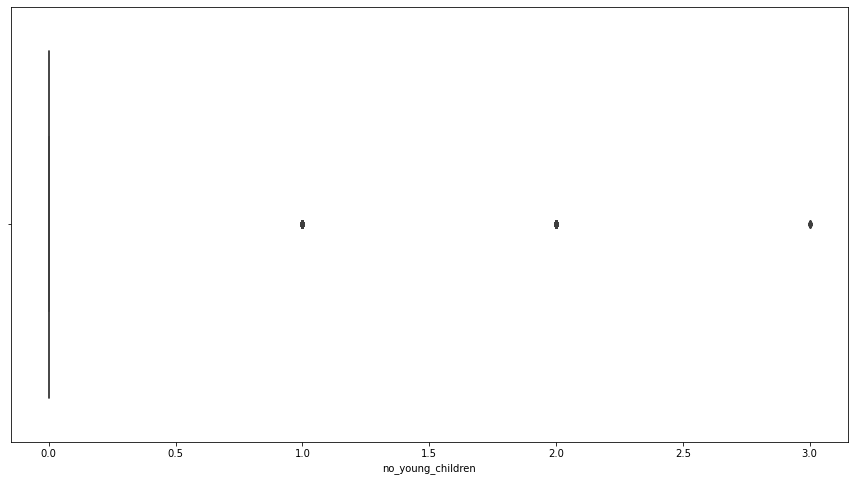

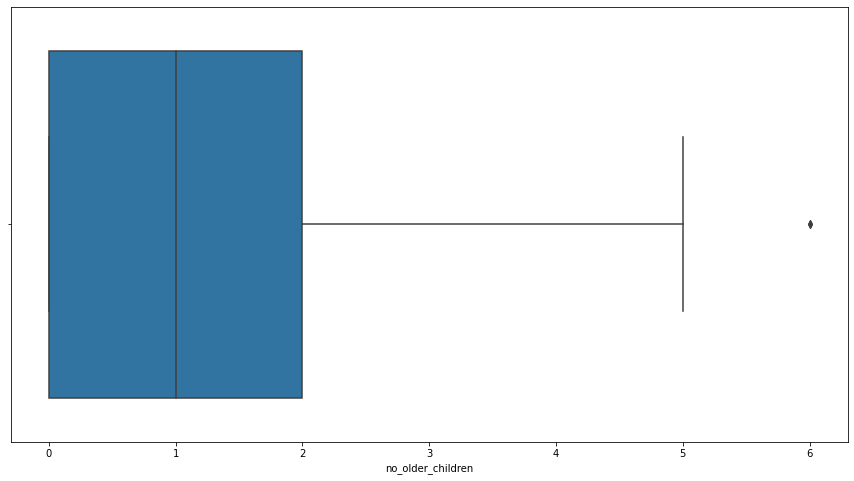

In [74]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

In [75]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
iqr = Q3-Q1
iqr

Salary               18145.5
age                     16.0
educ                     4.0
no_young_children        0.0
no_older_children        2.0
dtype: float64

In [76]:
outliers = (df1<(Q1-1.5*iqr))|(df1>(Q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


Holliday_Package       0
Salary                57
age                    0
educ                   4
foreign                0
no_older_children      2
no_young_children    207
dtype: int64

In [77]:
cor = df1.corr()
cor

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


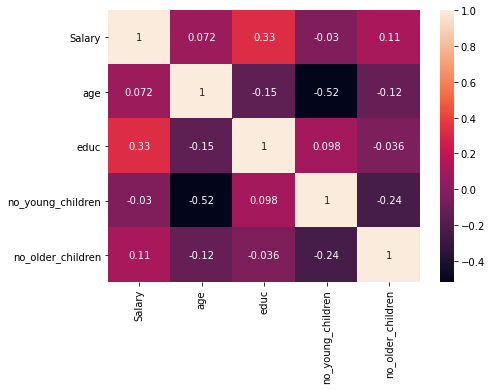

In [78]:
plt.figure(figsize=(7,5))
sns.heatmap(cor,annot=True)

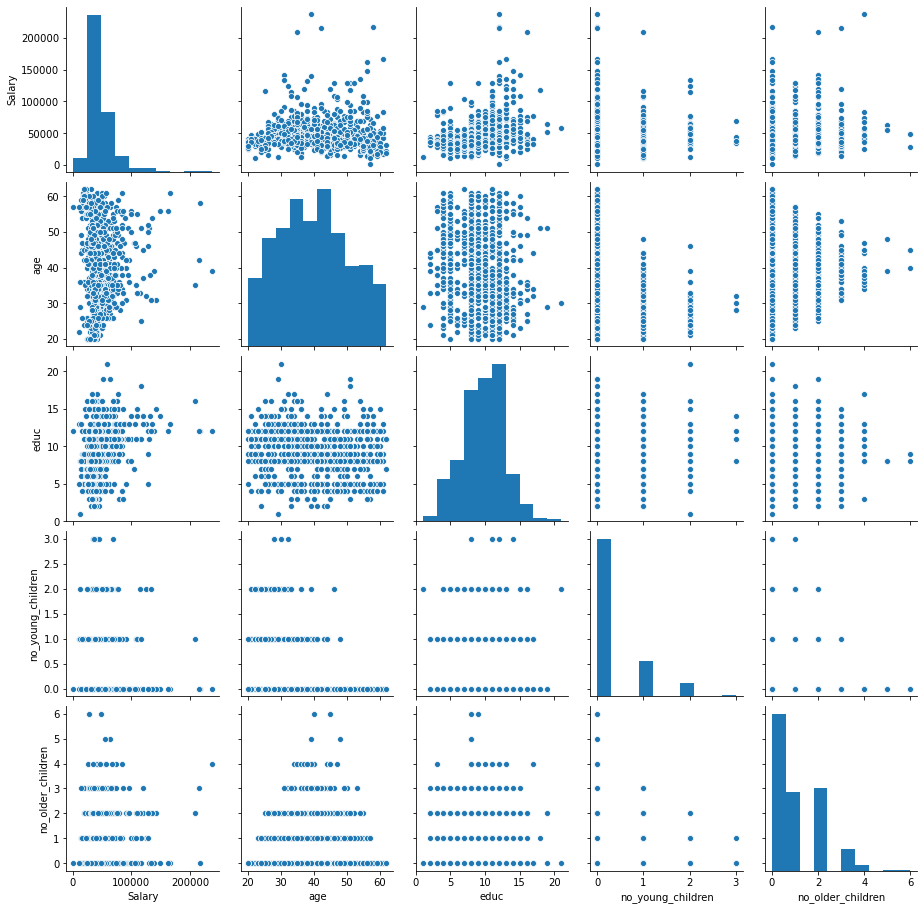

In [79]:
sns.pairplot(df1)

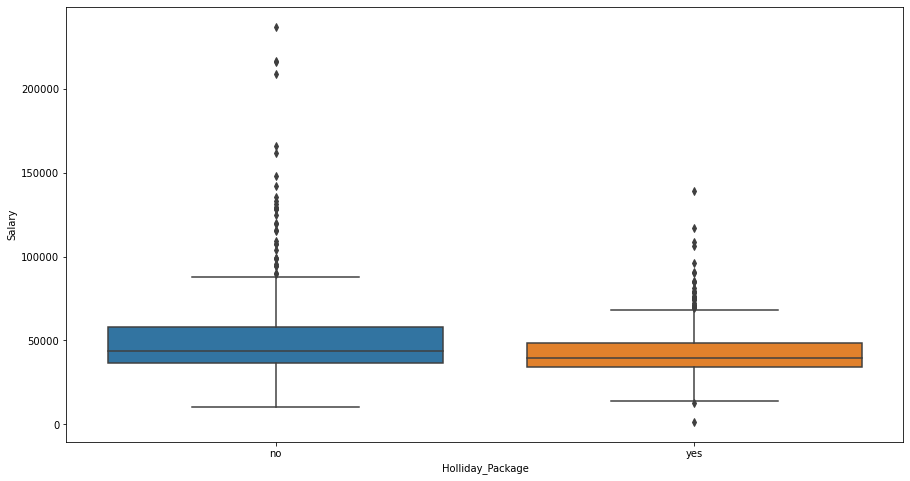

In [80]:
sns.boxplot(df1['Holliday_Package'],df1['Salary']);

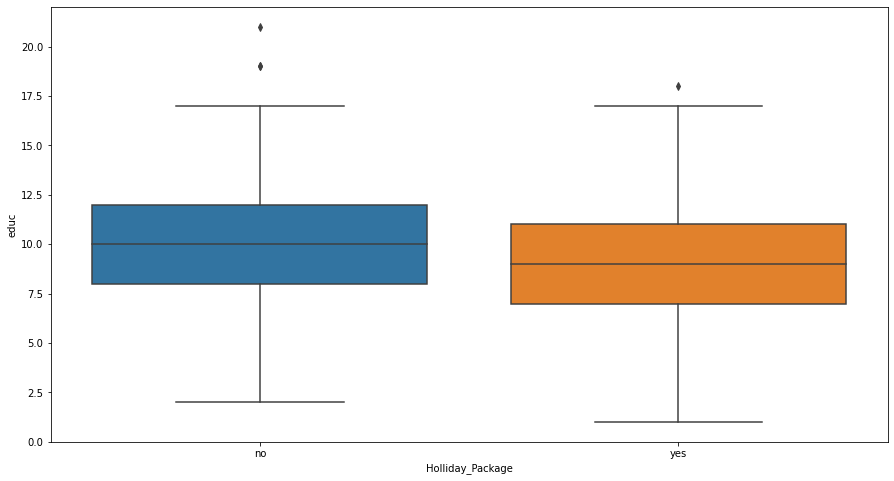

In [81]:
sns.boxplot(df1['Holliday_Package'],df1['educ']);

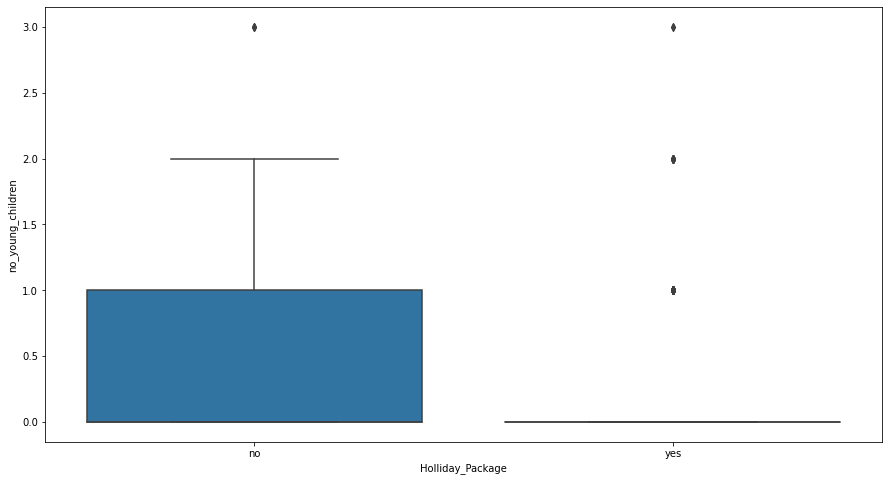

In [82]:
sns.boxplot(df1['Holliday_Package'],df1['no_young_children']);

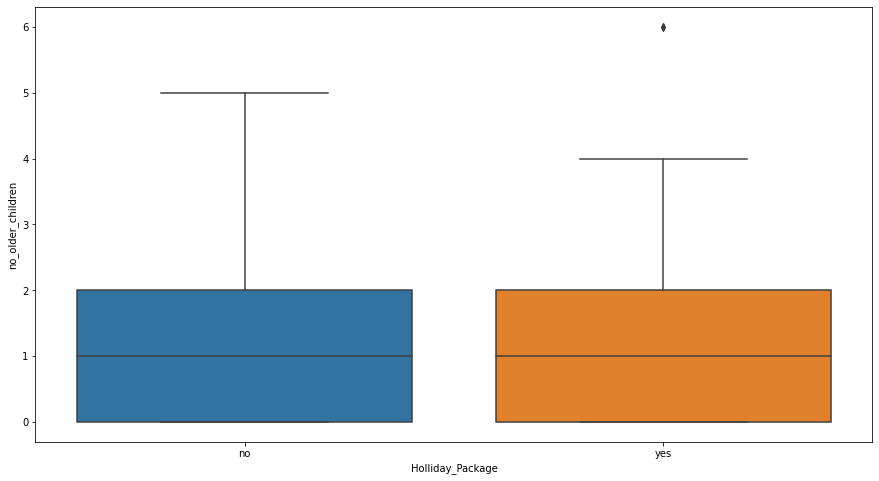

In [83]:
sns.boxplot(df1['Holliday_Package'],df1['no_older_children']);

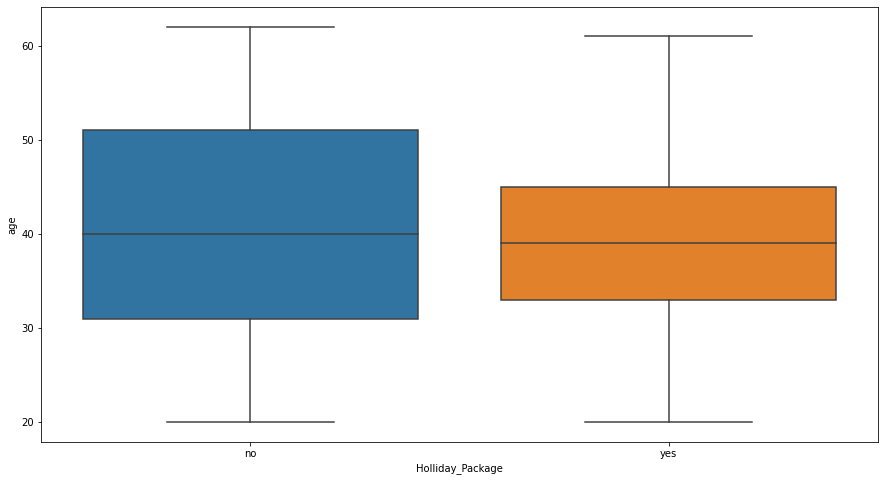

In [84]:
sns.boxplot(df1['Holliday_Package'],df1['age']);

<b>2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).</b>

In [85]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


<b>Train test split</b>

In [86]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [87]:
# Copy all the predictor variables into X dataframe
X = df1.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df1['Holliday_Package']

In [88]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [89]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [90]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

<b>Logistic Regression</b>

In [91]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001,0.01]}

In [92]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [93]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [94]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.01]},
             scoring='f1')

In [95]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [96]:
best_model = grid_search.best_estimator_

In [97]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [98]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697041,0.302959
3,0.496348,0.503652
4,0.557723,0.442277


<b>LDA</b>

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [100]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)

In [101]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test)

In [102]:
# Training Data Probability Prediction
pred_prob_train = model1.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model1.predict_proba(X_test)

<b>2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.</b>

<b>Logistic Regression</b>

In [103]:
best_model.score(X_train, y_train)

0.6672131147540984

AUC: 0.735


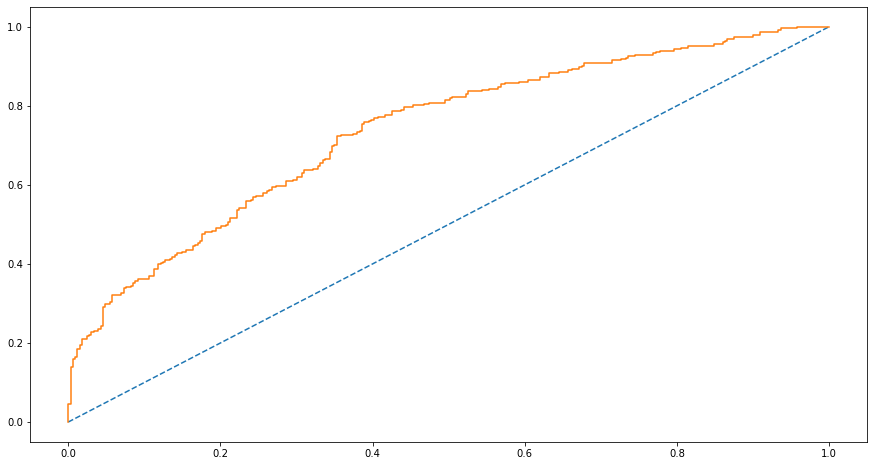

In [104]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [105]:
# Accuracy - Test Data
best_model.score(X_test, y_test)

0.6526717557251909

AUC: 0.735


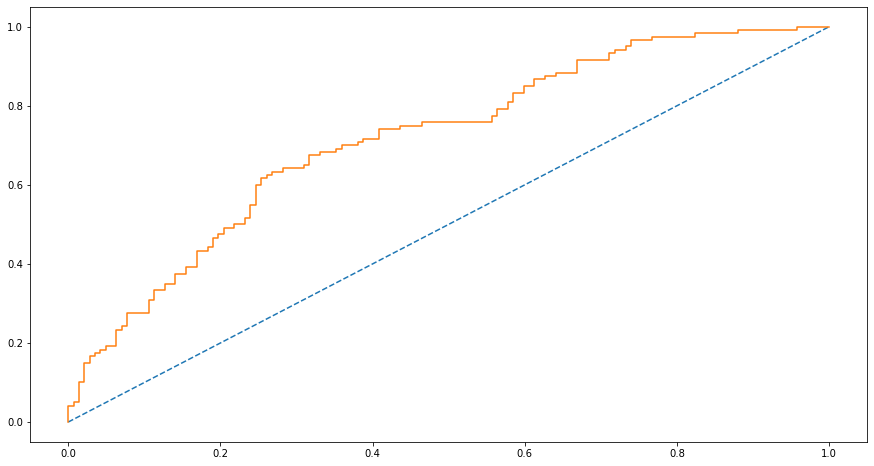

In [106]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [107]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

In [108]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

In [109]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [110]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



<b>LDA</b>

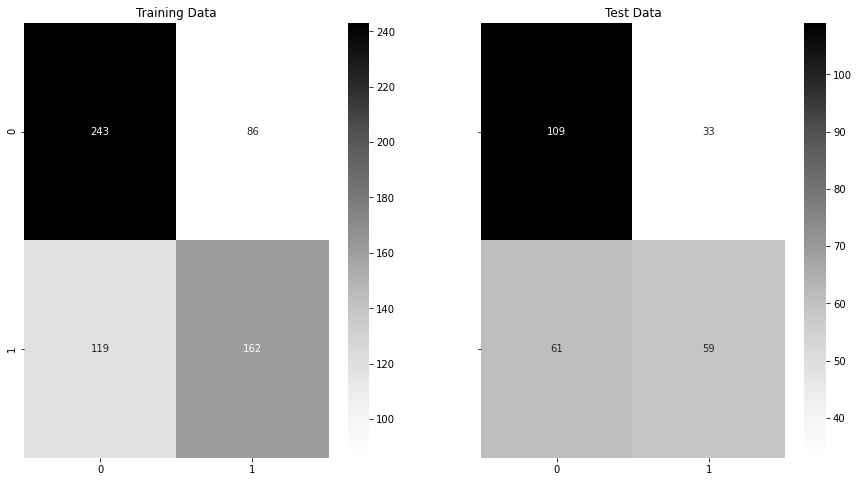

In [111]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [112]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


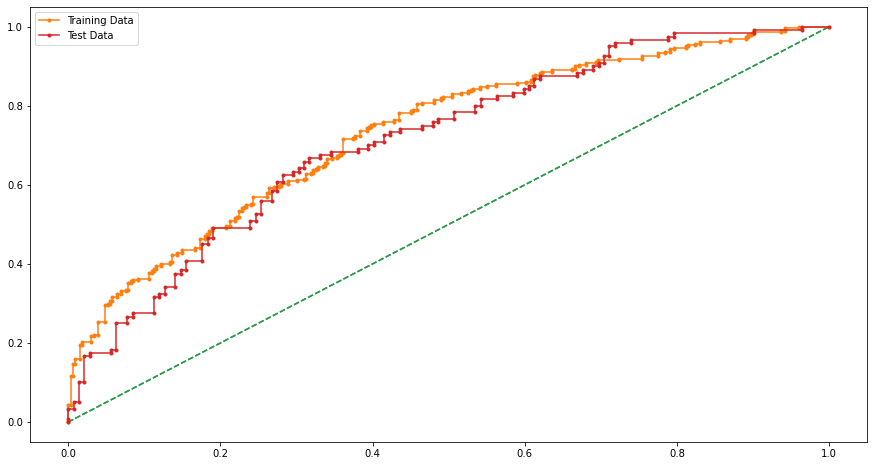

In [113]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()